In [1]:
# Import our dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
file_path = './Resources/processed_PLACES_COPD.csv'

In [3]:
# Importing the dataset
dataset = pd.read_csv(file_path)


In [4]:
dataset.head()

,Unnamed: 0,State,County,Levels_Smokers,Levels_COPD
0,0,Iowa,Cass,19.3,8.3
1,1,Iowa,Monona,18.5,8.3
2,2,Alaska,Dillingham,31.1,8.9
3,3,Colorado,Custer,13.8,7.5
4,4,Alaska,Ketchikan Gateway,19.4,6.6


In [5]:
dataset.drop(["Unnamed: 0","County"], axis = 1)

,State,Levels_Smokers,Levels_COPD
0,Iowa,19.3,8.3
1,Iowa,18.5,8.3
2,Alaska,31.1,8.9
3,Colorado,13.8,7.5
4,Alaska,19.4,6.6
...,...,...,...
3117,Wisconsin,16.8,6.5
3118,Wisconsin,15.1,5.5
3119,West Virginia,26.8,15.3
3120,Wisconsin,17.1,5.8


In [6]:
# dataset['Total_Population']= dataset['Total_Population'].astype(float)

In [7]:
le = LabelEncoder()
df2 = dataset.copy()

In [8]:
# Generate our categorical variable lists
dataset_cat = dataset.dtypes[dataset.dtypes == "object"].index.tolist()
dataset_cat

['State', 'County']

In [9]:
# For loop to encode text columns to numerical values
for textColumn in dataset_cat:
    df2[textColumn] = le.fit_transform(df2[textColumn])

In [10]:
# Display dataframe
df2

,Unnamed: 0,State,County,Levels_Smokers,Levels_COPD
0,0,15,270,19.3,8.3
1,1,15,1104,18.5,8.3
2,2,1,477,31.1,8.9
3,3,5,426,13.8,7.5
4,4,1,869,19.4,6.6
...,...,...,...,...,...
3117,3117,49,1462,16.8,6.5
3118,3118,49,209,15.1,5.5
3119,3119,48,1745,26.8,15.3
3120,3120,49,1785,17.1,5.8


In [11]:
#X = dataset.drop(['Levels_COPD'], axis = 1).values
#y = dataset['Levels_COPD']

In [12]:
# Create our features
a_cols = [i for i in df2.columns if i not in ('Levels_COPD')]
X = df2[a_cols]

# Create our target
y = df2['Levels_COPD']

In [14]:
# Step 3: Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05)

In [15]:
# Create a OneHotEncoder instance
# enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
# encode_df = pd.DataFrame(enc.fit_transform(dataset[dataset_cat]))

# Add the encoded variable names to the dataframe
# encode_df.columns = enc.get_feature_names_out(dataset_cat)

# Set options to show all columns
# pd.options.display.max_columns = 50

# View the dataframe
# encode_df.head()

In [16]:
# Step 4: Training the Random Forest Regression model on the training set

# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [22]:
regressor.feature_importances_

array([0.08262257, 0.05144574, 0.07248798, 0.79344372])

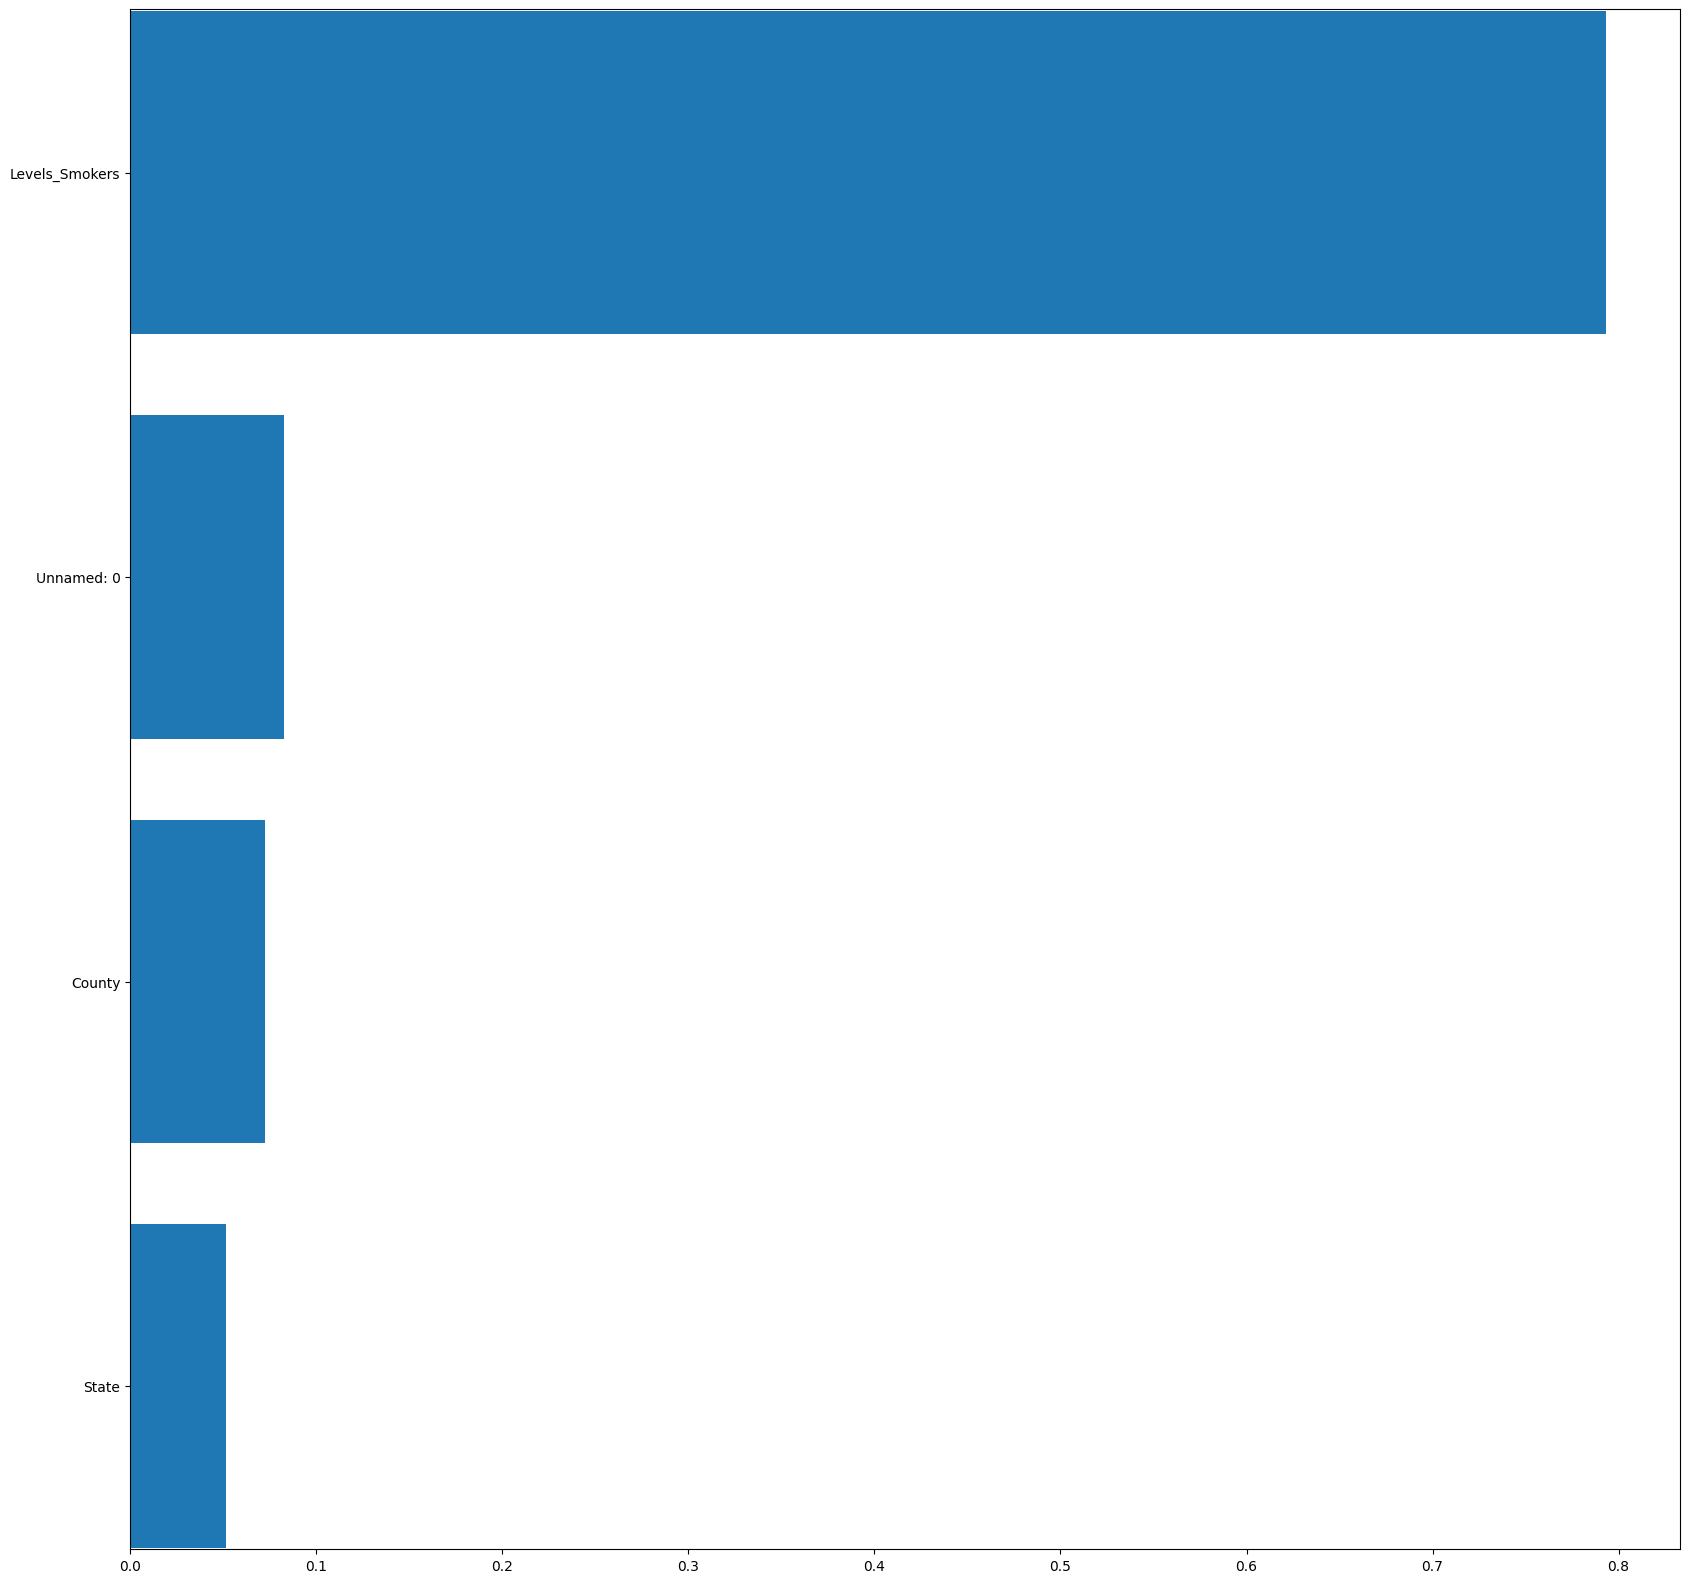

In [30]:
features = sorted(zip(X.columns, regressor.feature_importances_), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]
fig, ax = plt.subplots()
fig.set_size_inches(20,20)
plt.margins(y=0.001)
ax.barh(y=cols, width=width)
plt.show()

In [17]:
regressor.score(X_test, y_test)

0.7082592163667369

In [18]:
# Step 5: Predicting the Results

y_pred = regressor.predict(X_test)

In [19]:
# Step 6: Comparing the Real Values with Predicted Values
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
df

,Real Values,Predicted Values
17,6.1,5.03
1426,8.8,7.64
716,5.3,5.63
2771,9.2,8.30
1490,7.3,6.97
...,...,...
2460,12.8,11.69
1337,6.4,6.66
869,8.6,8.69
2614,4.5,5.86


ValueError: x and y must be the same size

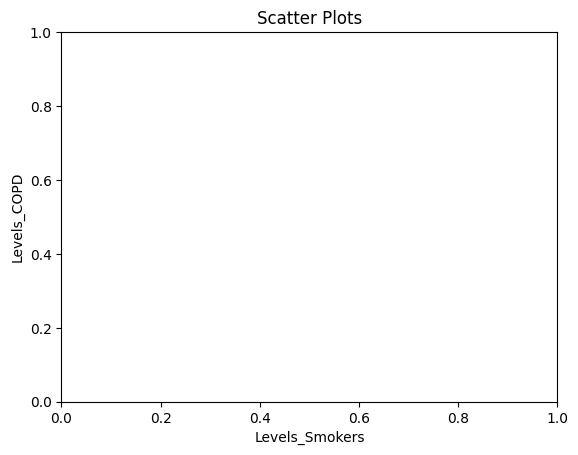

In [32]:
plt.title('Scatter Plots')
plt.xlabel('Levels_Smokers')
plt.ylabel('Levels_COPD')
plt.scatter(X, y)
plt.show()

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3122 entries, 0 to 3121
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3122 non-null   int64  
 1   State           3122 non-null   int64  
 2   County          3122 non-null   int64  
 3   Levels_Smokers  3122 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 97.7 KB


In [21]:
np.arange(X)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# # Visualising the Random Forest Regression Results  
# 
X_grid = np.arange(int (float(min(X))), int(float(max(X))), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_test, y_test, color = 'red')
plt.scatter(X_test, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Levels_Smokers')
plt.ylabel('Levels_COPD')
plt.show()

In [ ]:
plt.plot(X_grid, regressor.predict(X_grid), color = 'black')
plt.title('Random Forest Regression')
plt.xlabel('Temperature')
plt.ylabel('Revenue')
plt.show()

In [ ]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [ ]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [ ]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [ ]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [ ]:
# Check the structure of the Sequential model
nn_model.summary()

In [ ]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

In [ ]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

In [ ]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [ ]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")